# An introduction to Bayesian Inference

### Colm Talbot - 200626

In [1]:
%pylab inline

mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "Computer Modern Roman"
mpl.rcParams["font.size"] = 20
mpl.rcParams["text.usetex"] = True
mpl.rcParams["grid.alpha"] = 0
mpl.rcParams['text.latex.preamble'] = r'\newcommand{\mathdefault}[1][]{}'

Populating the interactive namespace from numpy and matplotlib


# What is Bayesian inference?

## Bayes theorem

$$p(A|B) = \frac{p(B|A)p(A)}{p(B)}$$

## Conditional probability

Let's simulate some data.

`A` and `B` are a random number of integers drawn from [0, 100).

In [3]:
data = dict(
    A=set(np.random.choice(100, np.random.randint(100), replace=False)),
    B=set(np.random.choice(100, np.random.randint(100), replace=False)),
)

## Conditional probability

Let's simulate some data.

`A` and `B` are a random number of integers drawn from [0, 100).

Let's visualise the sets using a Venn diagram.

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


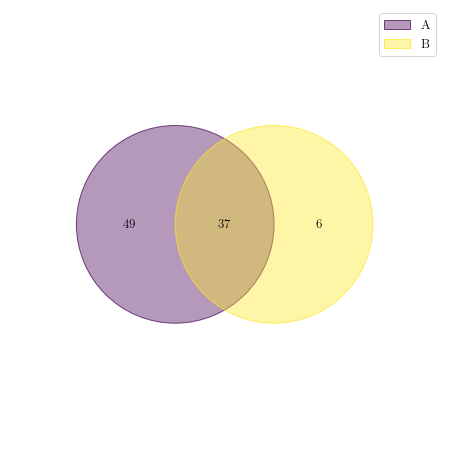

In [4]:
import venn

venn.venn(data)
plt.show()
plt.close()

## Conditional probability

Let's simulate some data.

`A` and `B` are a random number of integers drawn from [0, 100).

We can ask:
- What is the probability that any integer is in either `A` or `B`, i.e., $p(A)$ or $p(B)$
- What is the probability that any integer is in both `A` and `B`, i.e., $p(A, B)$
- What is the probability that any integer is in `A` given that we know it is in `B`, i.e., $p(A|B)$

In [5]:
p_a = len(data['A']) / 100
p_b = len(data['B']) / 100
p_a_and_b = len(data['A'].intersection(data['B'])) / 100
p_a_given_b = len(data['A'].intersection(data['B'])) / len(data['B'])
p_b_given_a = len(data['A'].intersection(data['B'])) / len(data['A'])

print(f"p(A) = {p_a : .4f}")
print(f"p(B) = {p_b : .4f}")
print(f"p(A, B) = {p_a_and_b : .4f}")
print(f"p(A | B) = {p_a_given_b : .4f}")
print(f"p(B | A) = {p_b_given_a : .4f}")

p(A) =  0.8600
p(B) =  0.4300
p(A, B) =  0.3700
p(A | B) =  0.8605
p(B | A) =  0.4302


## Conditional probability

Let's simulate some data.

`A` and `B` are a random number of integers drawn from [0, 100).

We can also ask:
- How are these related?

$$p(A, B) = p(A | B) p(B) = p(B | A) p(A)$$

In [6]:
print(f"p(A, B) = {p_a_and_b : .4f}")
print(f"p(A | B) p(B) = {p_a_given_b * p_b : .4f}")
print(f"p(B | A) p(A) = {p_b_given_a * p_a : .4f}")

p(A, B) =  0.3700
p(A | B) p(B) =  0.3700
p(B | A) p(A) =  0.3700


## Realistic applications

- `A`: the thing we want to infer, a physical model or the parameters describing that model, e.g.,
  - compact binary merger waveform model
  - interferometer noise response curve
  - individual black hole masses
  - the maximum black hole mass
  - virus spread rate
  - the distribution of birthdays
  - ...
- `B`: the data we have observed, e.g.,
  - gravitational-wave strain
  - photons from a kilonova
  - number of new virus cases
  - the birthdays of people in a room
  - ...

## Formalism

Restate Bayes' theorem:

$$ p(\theta | d, M, I) = \frac{\mathcal{L}(d | \theta, M, I) \pi(\theta | M, I)}{\mathcal{Z}(d | M, I)} $$

$$ \text{posterior} = \frac{\text{likelihood} \times \text{prior}}{\text{evidence}} $$

- $\theta$: model parameters
- $d$: observational/experimental data
- $M$: model
- $I$: all other information we have about the Universe

## Formalism - Prior

The [prior distribution](https://en.wikipedia.org/wiki/Prior_probability) is encodes the knowledge we have about the system before beginning the analysis.

There are many ways to choose a prior:
- the most common initial choice is to take a prior which is uniform over the parameters of interest, the ["likelihood principle"](https://en.wikipedia.org/wiki/Likelihood_principle)
- the [Jeffreys prior](https://en.wikipedia.org/wiki/Jeffreys_prior) is the "least informative" prior choice and is invariant under reparameterisation
- [conjugate priors](https://en.wikipedia.org/wiki/Conjugate_prior) can be chosen for a specific likelihood
- sometimes there is another natural prior for some space,
  - binary mergers are typically assumed to be distributed isotropically throughout the universe
  - we could also apply a prior based on the distribution of galaxies

## Formalism - Likelihood

The likelihood is the probability of the data given our model.

For LIGO analyses this requires a model of the interferometer noise and any astrophysical signals.

## Formalism - Posterior

The posterior distribution is one of the main targets of Bayesian inference.

It is the normalised product of the likelihood and the prior. A combination of our original knowledge and the information in the observed data.

It tells us the probability that some set of parameters for our model describes the data well.

For example, the probability that the binary system which produced [GW190814](https://www.ligo.org/detections/GW190814.php) had a mass ratio of ten to one.

## Formalism - Evidence

The evidence is a measure of how well the data are described by our model.

It is the normalisation factor for the posterior and is also known as the marginalised likelihood.

$$ \mathcal{Z}(d | M, I) = \int d\theta \mathcal{L}(d | \theta, M, I) \pi(\theta | M, I) $$

We can use the evidence with two different models to compare how well the two models fit the data.

## Formalism - Model selection

We can use the evidence with two different models to compare how well the two models fit the data.

We define the Bayes factor between two models, $M_1$, $M_2$

$$ BF^2_1(d) = \frac{\mathcal{Z}(d | M_2, I)}{\mathcal{Z}(d | M_2, I)} $$

This tells us the relative probability of observing the data given the two models.

However, we really want the relative probability of the two models given the data.

I.e., the posterior odds

$$ \mathcal{O}^2_1(d) = \frac{p(M_2 | d, I)}{p(M_1 | d, I)} = \frac{\mathcal{Z}(d | M_2, I)}{\mathcal{Z}(d | M_2, I)} \frac{\pi(M_2 | I)}{\pi(M_1 | I)} $$

The final term is the prior odds.
Our prior on which model is more likely.

## Formalism - Hierarchical inference

The posterior odds is powerful when comparing two models.

But what if there are multiple models?
What if the model is itself described by continuous parameteres?

We perform hierarchical inference

$$ p(\theta, \Lambda | d, M, I) = \frac{\mathcal{L}(d | \theta, M, I) \pi(\theta | M, \Lambda, I) \pi(\Lambda)}{\mathcal{Z}(d | M, I)} $$

- $\Lambda$: "hyperparameters" which determine the prior on $\theta$

Examples:
- $\theta$ are the masses of individual black holes
- $\Lambda$ are the parameters describing the shape of the distribution of all black hole masses

## Formalism - Posterior predictive distribution

What is the probability of obtaining new data, given the data we have already observed?

$$ p(d_{\text{new}} | d, M, I) = \int d\theta p(d_{\text{new}} | \theta, M, I) p(\theta | d, M, I) $$

Can use this as a check that the model is performing well.

## Case study - What is the distribution of our birthdays?

Divide birthdays into two groups:
- January-June
- July-December

If births are evenly distributed throughout the year there should be an (approximately) equal number of people in each.

## Case study - What is the distribution of our birthdays? - Prior

Divide birthdays into two groups:
- January-June
- July-December

If births are evenly distributed throughout the year there should be an (approximately) equal number of people in each.

Let's assume we know nothing about when people are likely to be born.
Prior is uniform in the range [0, 1]

$$ \pi(f) = 1 ; 0 \leq f \leq 1 $$

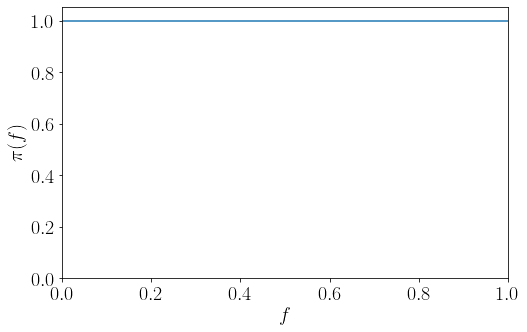

In [7]:
def prior(fraction_in_first_half):
    return 1 * (fraction_in_first_half >= 0) * (fraction_in_first_half <= 1)


fraction_in_first_half = np.linspace(0, 1, 1000)

plt.figure(figsize=(8, 5))
plt.plot(fraction_in_first_half, prior(fraction_in_first_half))
plt.xlim(0, 1)
plt.ylim(0, )
plt.xlabel("$f$")
plt.ylabel("$\pi(f)$")
plt.show()
plt.close()

## Case study - What is the distribution of our birthdays? - Data gathering

Divide birthdays into two groups:
- January-June
- July-December

If births are evenly distributed throughout the year there should be an (approximately) equal number of people in each.

- N_1 = number in first half
- N_2 = number in second half

In [8]:
number_in_first_half = 10
number_in_second_half = 9

## Case study - What is the distribution of our birthdays? - Likelihood

Divide birthdays into two groups:
- January-June
- July-December

If births are evenly distributed throughout the year there should be an (approximately) equal number of people in each.

Use binomial likelihood distribution for fraction of people born in first half

$$ p(\text{first half} | f) = f $$
$$ p(\text{second half} | f) = 1 -f $$

$$ \mathcal{L}(N_1, N_2 | f) = f^{N_1} (1 - f)^{N_2} $$

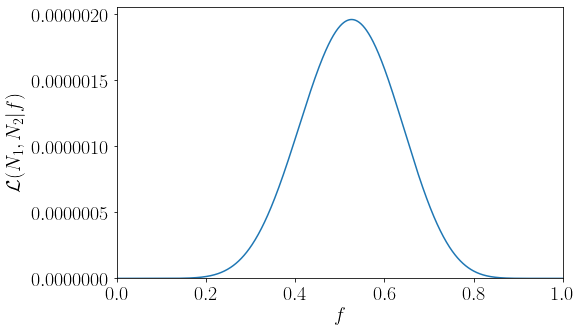

In [9]:
def likelihood(number_in_first_half, number_in_second_half, fraction_in_first_half):
    return (
        fraction_in_first_half ** number_in_first_half
        * (1 - fraction_in_first_half) ** number_in_second_half
    )


plt.figure(figsize=(8, 5))
plt.plot(
    fraction_in_first_half,
    likelihood(number_in_first_half, number_in_second_half, fraction_in_first_half)
)
plt.xlim(0, 1)
plt.ylim(0, )
plt.xlabel("$f$")
plt.ylabel("$\mathcal{L}(N_1, N_2 | f)$")
plt.show()
plt.close()

## Case study - What is the distribution of our birthdays? - Evidence

Divide birthdays into two groups:
- January-June
- July-December

If births are evenly distributed throughout the year there should be an (approximately) equal number of people in each.

We can now write down the evidence:

$$ \mathcal{Z}(N_1, N_2) = \int df f^{N_1} (1 - f)^{N_2} = \text{B}(N_1 + 1, N_2 + 1) $$

B - the Beta function

In [10]:
from scipy.special import beta

def evidence(number_in_first_half, number_in_second_half):
    return beta(number_in_first_half + 1, number_in_second_half + 1)

print(f"Evidence = {evidence(number_in_first_half, number_in_second_half)}")

Evidence = 5.412544112234514e-07


## Case study - What is the distribution of our birthdays? - Posterior

Divide birthdays into two groups:
- January-June
- July-December

If births are evenly distributed throughout the year there should be an (approximately) equal number of people in each.

We can now write down the evidence:

$$ \mathcal{Z}(N_1, N_2) = \int df f^{N_1} (1 - f)^{N_2} = \text{B}(N_1 + 1, N_2 + 1) $$

B - the Beta function

and the posterior:

$$ p(f | N_1, N_2) = \frac{f^{N_1} (1 - f)^{N_2}}{\text{B}(N_1 + 1, N_2 + 1)} $$

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


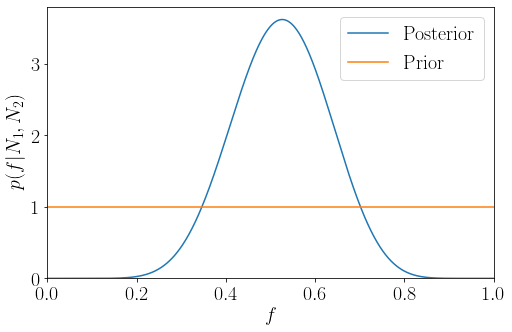

In [11]:
from scipy.special import beta

def posterior(
    number_in_first_half, number_in_second_half, fraction_in_first_half
):
    return (
        likelihood(number_in_first_half, number_in_second_half, fraction_in_first_half)
        * prior(fraction_in_first_half)
        / evidence(number_in_first_half, number_in_second_half)
    )


plt.figure(figsize=(8, 5))
plt.plot(
    fraction_in_first_half,
    posterior(number_in_first_half, number_in_second_half, fraction_in_first_half),
    label="Posterior"
)
plt.plot(fraction_in_first_half, prior(fraction_in_first_half), label="Prior")
plt.xlim(0, 1)
plt.ylim(0, )
plt.xlabel("$f$")
plt.ylabel("$p(f | N_1, N_2)$")
plt.legend()
plt.show()
plt.close()